In [1]:
import sys 
sys.path.append('../')

import itertools
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from qiskit.algorithms.optimizers import SPSA
from quantum_neural_networks import StateDiscriminativeQuantumNeuralNetworks as nnd, QuantumState 

In [2]:
def callback( params, results, prob_error, prob_inc, prob):
    datos.append([prob,prob_error,prob_inc]) 

(array([-1.67340625e+00, -2.20443936e+00, -5.72070770e-01,  2.98727799e-03,
       -3.32193229e-03,  3.14617626e+00,  1.47753683e+00, -2.01470833e+00,
       -1.93010965e+00,  2.94813269e+00, -3.47914651e-01, -2.30964906e+00,
        1.76048600e+00,  1.32128052e+00, -8.52943823e-01, -2.18920506e+00,
       -1.81151817e+00,  1.57911197e-01,  1.34888678e+00]), 0.00166015625, 200)


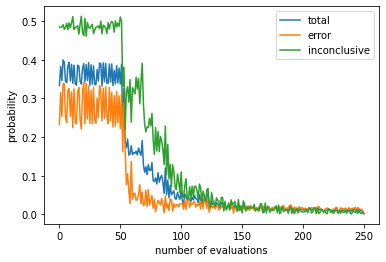

In [3]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(1)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2  = 2*[0], 2*[pi]
th_v1, th_v2 = 2*[0], 2*[0]
fi_v1, fi_v2 = 2*[0], 2*[0]
lam_v1, lam_v2 = 2*[0],  2*[0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
α_err = 0.6
α_inc = 0.4
discriminator = nnd( [ ψ, ϕ ], True, α_err, α_inc  )

datos = [ ]
results = discriminator.discriminate( SPSA(100), params, callback=callback )

print( results )

plt.plot( datos , '-')
plt.xlabel('number of evaluations')
plt.ylabel('probability')
plt.legend([ 'total', 'error', 'inconclusive' ])

(array([-0.35314874, -0.6363514 , -0.90031578,  3.10249823, -0.07066018,
        2.98651811,  3.1838686 , -0.22685932, -1.13369044, -0.49010282,
       -0.0526825 , -0.1310938 , -1.56311075, -0.86250028, -0.50677929,
       -2.1954749 ,  0.79146746, -0.16599292, -0.1805724 ]), 0.32623697916666666, 200)


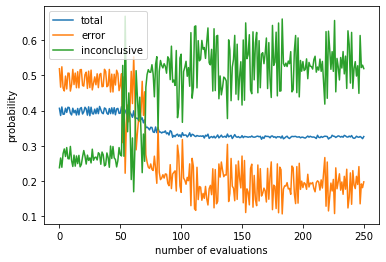

In [4]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(1)
χ = QuantumState.random(1)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2  = 2*[0], 2*[pi]
th_v1, th_v2 = 2*[0], 2*[0]
fi_v1, fi_v2 = 2*[0], 2*[0]
lam_v1, lam_v2 = 2*[0],  2*[0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
α_err = 0.6
α_inc = 0.4
discriminator = nnd( [ ψ, ϕ, χ ], True, α_err, α_inc  )

datos = [ ]
results = discriminator.discriminate( SPSA(100), params, callback=callback )

print( results )

plt.plot( datos , '-')
plt.xlabel('number of evaluations')
plt.ylabel('probability')
plt.legend([ 'total', 'error', 'inconclusive' ])

(array([-2.04140091, -0.01292986,  1.64739947,  0.05578981, -4.34163103,
        3.07199307,  0.07747466,  1.61150856, -2.25975516,  0.04550606,
        0.96846311,  2.91989867,  2.90507106,  2.12409093,  1.09824914,
       -1.11923764, -0.00680841,  1.72215558,  1.25123258]), 0.2807725694444444, 200)


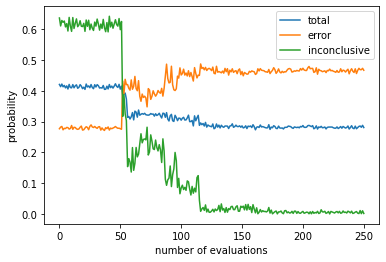

In [5]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(2)
χ = QuantumState.random(3)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2  = 2*[0], 2*[pi]
th_v1, th_v2 = 2*[0], 2*[0]
fi_v1, fi_v2 = 2*[0], 2*[0]
lam_v1, lam_v2 = 2*[0],  2*[0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
α_err = 0.6
α_inc = 0.4
discriminator = nnd( [ ψ, ϕ, χ ], True, α_err, α_inc  )

datos = [ ]
results = discriminator.discriminate( SPSA(100), params, callback=callback )

print( results )

plt.plot( datos , '-')
plt.xlabel('number of evaluations')
plt.ylabel('probability')
plt.legend([ 'total', 'error', 'inconclusive' ])